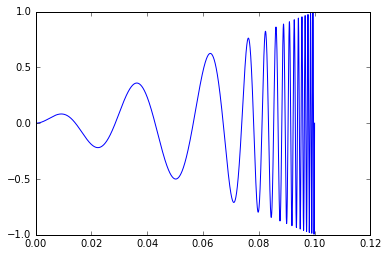

In [92]:
%matplotlib inline
import math as m
import pyaudio
import numpy #array operations
import matplotlib.pyplot as plt #plotting
import wave

te=0.1
fs=35.
fe=150.
t=numpy.linspace(0.,te,int(te*44100))
f=fs+(fe-fs)*(t/te)**10
si=numpy.sin(f*2.*m.pi*t)*(t/te)
plt.plot(t,si)

#Play audio
PyAudio = pyaudio.PyAudio
p = PyAudio()

stream = p.open(format=pyaudio.paFloat32, channels=1, rate=44100, output=1)
stream.write(si.astype(numpy.float32).tostring())
stream.stop_stream()
stream.close()
p.terminate()

#Save Audio
siw=numpy.array(numpy.round(si * ((2**(32-1))-1)), dtype=numpy.dtype('<i%d' % (32/8)))
wf = wave.open('einsound.wav', 'wb')
wf.setparams((1, 32/8, 44100, 0, 'NONE', 'not compressed'))
wf.setnchannels(1)
wf.writeframes(siw.tostring())
wf.close()
